# Feature Importance

In [1]:
import numpy
from matplotlib import pyplot
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
from sklearn import datasets, model_selection

## Data Set

In [6]:
data = datasets.load_boston()

print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
X, Y = shuffle(data.data, data.target, random_state=7)
split = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

feature_train, feature_test = split[0], split[1]
class_train, class_test = split[2], split[3]

## The Regressor

In [13]:
decision_tree = DecisionTreeRegressor(max_depth=4)
regressor = AdaBoostRegressor(decision_tree, n_estimators=400, random_state=7)
regressor.fit(feature_train, class_train)

predictions = regressor.predict(feature_test)
mse = mean_squared_error(class_test, predictions)
evs = explained_variance_score(class_test, predictions)

print("AdaBoost Regressor:")
print("\tMean Squared Error: {:.2f}".format(mse))
print("\tExplained Variance Score: {:.2f}".format(evs))

AdaBoost Regressor:
	Mean Squared Error: 22.30
	Explained Variance Score: 0.80


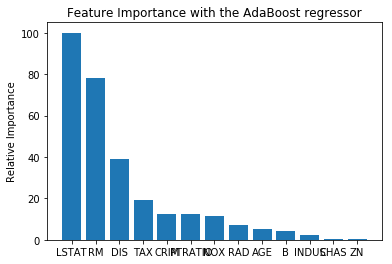

In [14]:
feature_importance = 100 * (regressor.feature_importances_ / max(regressor.feature_importances_))
feature_names = data.feature_names
index_sorted = numpy.flipud(numpy.argsort(feature_importance))
pos = numpy.arange(index_sorted.shape[0]) + 0.5

pyplot.figure()
pyplot.bar(pos, feature_importance[index_sorted], align="center")
pyplot.xticks(pos, feature_names[index_sorted])
pyplot.ylabel("Relative Importance")
pyplot.title("Feature Importance with the AdaBoost regressor")
pyplot.show()